# Introduction to Natural Language Processing

### Tutorial 7

---

In this tutorial, we will go over four of the most frequently used NLP tasks by leveraging pre-trained models available on Hugging Face 🤗. We also learn how to fine-tune a pretrained model for a text classification task.

### Hugging Face

Hugging Face is an AI community and Machine Learning platform created in 2016. It aims to democratize NLP by providing Data Scientists, AI practitioners, and Engineers immediate access to over 20,000 pre-trained models based on the state-of-the-art transformer architecture. These models can be applied to:

* Text
* Speech (Audio)
* Vision
* Tabular Data
* Reinforcement Learning

## Importing Hugging Face

**Note:** Before running any of the code in this notebook, you should have gone through the [Hugging Face setup steps](https://huggingface.co/docs/transformers/installation).

Let's start by importing Hugging Face and checking the version we're using.

In [2]:
import transformers
transformers.__version__

'4.29.0'

## Intro to Hugging Face

Let's explore the Documentation on [Hugging Face](https://huggingface.co/).

### Explore Hugging Face Pipeline

**Behind the pipeline**:


Pipeline groups together three steps: preprocessing, passing the inputs through the model, and postprocessing:

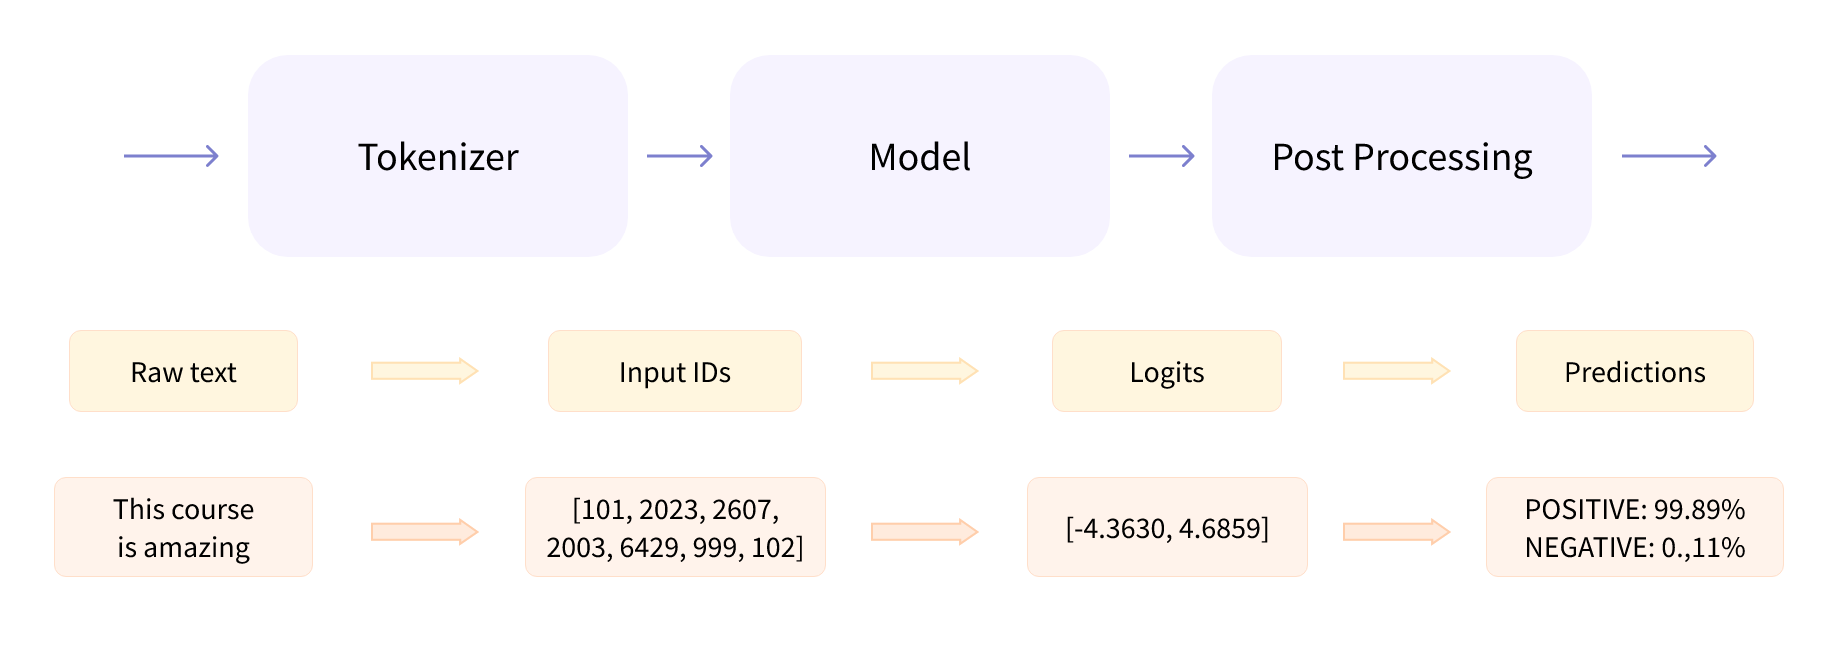

In [3]:
from transformers import pipeline

In [4]:
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
task = 'sentiment-analysis'

classifier = pipeline(task=task, model=model_name)

In [5]:
pos_sent = "This Course is amazing"
neg_sent = "This movie was waste of time"

In [6]:
classifier(pos_sent), classifier(neg_sent)

([{'label': 'POSITIVE', 'score': 0.9998831748962402}],
 [{'label': 'NEGATIVE', 'score': 0.9998168349266052}])

In [7]:
classifier(
    [pos_sent, neg_sent]
)

[{'label': 'POSITIVE', 'score': 0.9998831748962402},
 {'label': 'NEGATIVE', 'score': 0.9998168349266052}]

### Manual Prediction

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, BertTokenizer

In [9]:
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'

pretrained_model = AutoModelForSequenceClassification.from_pretrained(model_name)

**Why "Auto"?**

Using 'Auto' is advantagous as it updates the rest of your code by simply changing the model name input.

In [10]:
distilBert_tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [11]:
# What if we use BertTokenizer?
bert_tokenizer = BertTokenizer.from_pretrained(model_name)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [12]:
distilBert_tokenizer(pos_sent)

{'input_ids': [101, 2023, 2607, 2003, 6429, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

**Note:**
Token IDS will change from model-to-model (including special token IDs)

In [13]:
input_pos, input_neg = distilBert_tokenizer(pos_sent), distilBert_tokenizer(neg_sent)

In [14]:
# pos_sent = "This Course is amazing"
# neg_sent = "This movie was waste of time"

input_pos, input_neg

({'input_ids': [101, 2023, 2607, 2003, 6429, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]},
 {'input_ids': [101, 2023, 3185, 2001, 5949, 1997, 2051, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]})

In [15]:
# Let's try this one:
distilBert_tokenizer.convert_ids_to_tokens([101, 2023])

['[CLS]', 'this']

**What is attention mask?**

The attention mask is a binary tensor indicating the position of the padded indices so that the model does not attend to them. For the BertTokenizer, 1 indicates a value that should be attended to, while 0 indicates a padded value.

In [16]:
pytorch_batch = distilBert_tokenizer(
    [pos_sent, neg_sent],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [17]:
pytorch_batch

{'input_ids': tensor([[ 101, 2023, 2607, 2003, 6429,  102,    0,    0],
        [ 101, 2023, 3185, 2001, 5949, 1997, 2051,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}

In [18]:
pretrained_output = pretrained_model(**pytorch_batch)
pretrained_output

SequenceClassifierOutput(loss=None, logits=tensor([[-4.3640,  4.6905],
        [ 4.7788, -3.8260]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

**What are logits?** The logits are the raw output of the BERT Model before a softmax activation function is applied to the output of BERT.

In [19]:
from torch import nn

pretrained_predictions = nn.functional.softmax(pretrained_output.logits, dim=-1)

In [20]:
pretrained_predictions

tensor([[1.1685e-04, 9.9988e-01],
        [9.9982e-01, 1.8320e-04]], grad_fn=<SoftmaxBackward0>)

### 1. Text Generation

In [21]:
model = "roberta-base"

task = "text-generation"

# Instantiate pipeline
generator = pipeline(model = model, task = task, max_new_tokens = 50)

input_text = "If you are interested in learing more about transformers, I would"

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


In [22]:
output = generator(input_text)

output

[{'generated_text': 'If you are interested in learing more about transformers, I would would like like'}]

In [23]:
model = "gpt2"

task = "text-generation"

# Instantiate pipeline
generator = pipeline(model = model, task = task, max_new_tokens = 50)

input_text = "If you are interested in learing more about transformers, I would"

In [24]:
output = generator(input_text)

output

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "If you are interested in learing more about transformers, I would recommend to check out the DeviantArt site, by the way. It offers pretty comprehensive information as well as a lot of photos, so there's plenty to find and read about tandem transformers, or both.\n\nThis article will focus on"}]

### 2. Question Answering

In [25]:
model = 'distilbert-base-cased-distilled-squad'

answerer = pipeline(model = model, task="question-answering")

question = "What does NLP stand for?"
context = "Today we are talking about machine learning and specifically the natural language processing, which enables computers to\
understand, process and generate languages"

# Generate predictions
preds = answerer(
    question = question,
    context = context,
)

# Return results
print(
    f"score: {round(preds['score'], 4)}, start: {preds['start']}, end: {preds['end']}, answer: {preds['answer']}"
)

score: 0.3621, start: 65, end: 92, answer: natural language processing


In [26]:
model = "deepset/roberta-base-squad2"

task = "question-answering"

answerer = pipeline(task = task, model = model)


qa_input = {
    'question': 'What does NLP stand for?',
    'context': 'Today we are talking about machine learning and specifically the natural language processing, which enables computers to understand, process and generate languages'
}

In [27]:
output = answerer(qa_input)

output

{'score': 0.04662785306572914,
 'start': 65,
 'end': 92,
 'answer': 'natural language processing'}

### 3. Summarization

In [28]:
model = "ainize/bart-base-cnn"

summarizer = pipeline(task = "summarization", model=model)

In [29]:
text = """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.
"""

In [30]:
summarizer(text, max_length=40, min_length=10)

[{'summary_text': 'In most of the premier American universities engineering curricula now concentrate on engineering science .\nThere is greater concentration on high technology subjects, largely supporting increasingly complex scientific developments .'}]

# Fine-tuning RoBERTa for a binary text classification

Now, we are going to fine-tune RoBERTa to predict labels for a given piece of text.

**Note:** This add a linear layer on top of the base model, which is used to produce a tensor of shape (batch_size, num_labels), indicating the unnormalized scores for a number of labels for every example in the batch.


## Load dataset

Let's download a binary text classification dataset from the [hub](https://huggingface.co/datasets/).

Note that you can also easily load your local data (i.e. csv files, txt files, Parquet files, JSON, ...) as explained [here](https://huggingface.co/docs/datasets/nlp_load).

In [33]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")

Found cached dataset rotten_tomatoes (/Users/vahidsj/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


  0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

Let's check the first example of the training split:

In [35]:
example = dataset['train'][0]
example

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [36]:
dataset['train'].features.values()

dict_values([Value(dtype='string', id=None), ClassLabel(names=['neg', 'pos'], id=None)])

In [38]:
import pandas as pd

In [39]:
df_train = pd.DataFrame(dataset['train'])

In [40]:
df_train

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


### Downsample the dataset

In [43]:
from datasets import DatasetDict

In [44]:
# 90% train, 10% test + validation
train_testvalid_dataset = dataset['train'].train_test_split(train_size=100, test_size=20, seed=42, stratify_by_column="label")
# Split the 10% test + valid in half test, half valid
test_valid_dataset = train_testvalid_dataset['test'].train_test_split(test_size=0.5, stratify_by_column="label")

train_test_valid_dataset = DatasetDict({
    'train': train_testvalid_dataset['train'],
    'test': test_valid_dataset['test'],
    'valid': test_valid_dataset['train']})

dataset = train_test_valid_dataset

Loading cached split indices for dataset at /Users/vahidsj/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46/cache-2757bfb6b634ebcc.arrow and /Users/vahidsj/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46/cache-4d510abe72cb81ce.arrow


## Preprocess data

As models like RoBERTa don't expect text as direct input, but rather `input_ids`, etc., we tokenize the text using the tokenizer. Here, we use the `AutoTokenizer` API, which will automatically load the appropriate tokenizer based on the checkpoint on the hub.

To prepare the text to be fed to the model, we will:

   1. load the tokenizer
   2. define a tokenization function for batch processing
   3. tokenize our training, test, and validation text inputs (with parallel processing!)

In [45]:
from transformers import AutoTokenizer
import numpy as np

roberta_tokenizer = AutoTokenizer.from_pretrained("roberta-base")

In [46]:
def tokenize_function(examples):
    
    """ This function tokenizes the text in the examples dictionary.
        We pass it to the map function of the dataset so that we can batch the tokenization for efficiency by
        tokenizing batches in parallel.
    """
    return roberta_tokenizer(examples["text"], padding="max_length", truncation=True)

In [47]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

In [48]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 100
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    valid: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [49]:
example = tokenized_datasets['train'][10]
print(example.keys())

dict_keys(['text', 'label', 'input_ids', 'attention_mask'])


In [50]:
print(example['text'])

the vampire thriller blade ii starts off as a wild hoot and then sucks the blood out of its fun  toward the end , you can feel your veins cringing from the workout .


In [51]:
print(example['attention_mask'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [52]:
roberta_tokenizer.decode(example['input_ids'])

'<s>the vampire thriller blade ii starts off as a wild hoot and then sucks the blood out of its fun \x96 toward the end, you can feel your veins cringing from the workout.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

In [53]:
tokenized_batch_sample = tokenize_function(dataset["train"][:10])

In [54]:
# Let's explore the first 10 samples of our tokenized dataset
pd.DataFrame(tokenized_datasets["train"][0:10])

,text,label,input_ids,attention_mask
0,a movie that reminds us of just how exciting a...,1,"[0, 102, 1569, 14, 14236, 201, 9, 95, 141, 357...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,film can't quite maintain its initial momentum...,1,"[0, 21928, 64, 75, 1341, 3014, 63, 2557, 4093,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"the film is powerful , accessible and funny . ...",1,"[0, 627, 822, 16, 2247, 2156, 6500, 8, 6269, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"creepy , authentic and dark . this disturbing ...",1,"[0, 34868, 2462, 219, 2156, 12757, 8, 2933, 47...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,one can't deny its seriousness and quality .,1,"[0, 1264, 64, 75, 7631, 63, 24146, 8, 1318, 47...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
5,"hu and liu offer natural , matter-of-fact perf...",1,"[0, 6455, 8, 16787, 257, 904, 1632, 2156, 948,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6,"what makes how i killed my father compelling ,...",1,"[0, 12196, 817, 141, 939, 848, 127, 1150, 9669...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
7,"it's mildly amusing , but i certainly can't re...",0,"[0, 405, 18, 33019, 31236, 2156, 53, 939, 1819...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
8,fans of nijinsky will savor every minute of co...,1,"[0, 506, 1253, 9, 295, 2161, 16444, 40, 14065,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
9,"the film hinges on its performances , and both...",1,"[0, 627, 822, 33374, 15, 63, 4476, 2156, 8, 25...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


### Define model

Here we define a model that includes a pre-trained base (i.e. the weights from roberta-base) are loaded, with a random initialized classification head (linear layer) on top. One should fine-tune this head, together with the pre-trained base on a labeled dataset. (This is also printed by the warning.)

This is also printed by the warning.

An AutoClass is a shortcut that automatically retrieves the architecture of a pre-trained model from its path. You only need to select the appropriate AutoClass [AutoClass](https://huggingface.co/docs/transformers/model_doc/auto) for your task.


The difference between `AutoModel` and `AutoModelForSequenceClassification` model is that `AutoModelForSequenceClassification` has a classification head on top of the model outputs which can be easily trained with the base model.

In [55]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

### Train the model

Now, we train the model using HuggingFace's Trainer API. This requires us to define 2 things: 

* `TrainingArguments`, which specify training hyperparameters. All options can be found in the [docs](https://huggingface.co/docs/transformers/v4.26.1/en/main_classes/trainer#transformers.TrainingArguments). TrainingArguments contain the model hyperparameters, which you can change like learning rate, batch size, and the number of epochs to train for.
* a `Trainer` object (docs can be found [here](https://huggingface.co/docs/transformers/v4.26.1/en/main_classes/trainer#transformers.Trainer)). Transformers provide a Trainer class for PyTorch, which contains the basic training loop and adds additional functionality for features like distributed training, mixed precision, and more.

In [56]:
from transformers import TrainingArguments, Trainer

In [57]:
training_args = TrainingArguments(
    output_dir="my_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

### Define an evaluation metric

We are also going to compute metrics while training. For this, we need to define a `compute_metrics` function, that returns a dictionary with the desired metric values.

In [58]:
# 1.

import numpy as np
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 2.

clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return clf_metrics.compute(predictions=predictions, references=labels)

Let's verify a batch as well as a forward pass:

**Note:** Try to fix the error!

In [59]:
#tokenized_datasets['train'][0]['label'].type()

In [60]:
#tokenized_datasets['train']['input_ids'][0]

In [61]:
#forward pass
#outputs = model(input_ids=tokenized_datasets['train']['input_ids'][0].unsqueeze(0), labels=tokenized_datasets['train'][0]['label'].unsqueeze(0))

### Define the training arguments and instantiate the Trainer class

Let's start training!

In [62]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

In [63]:
trainer.train()

/Users/vahidsj/opt/anaconda3/envs/AllPackages/lib/python3.11/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.692541,0.500000,0.000000,0.000000,0.000000


/Users/vahidsj/opt/anaconda3/envs/AllPackages/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=7, training_loss=0.707350322178432, metrics={'train_runtime': 800.1163, 'train_samples_per_second': 0.125, 'train_steps_per_second': 0.009, 'total_flos': 26311105536000.0, 'train_loss': 0.707350322178432, 'epoch': 1.0})

## Evaluate

After training, we evaluate our model on the validation set.

In [64]:
trainer.evaluate()

/Users/vahidsj/opt/anaconda3/envs/AllPackages/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6925410032272339,
 'eval_accuracy': 0.5,
 'eval_f1': 0.0,
 'eval_precision': 0.0,
 'eval_recall': 0.0,
 'eval_runtime': 23.4441,
 'eval_samples_per_second': 0.427,
 'eval_steps_per_second': 0.043,
 'epoch': 1.0}

In [65]:
trainer.evaluate(tokenized_datasets["valid"])

/Users/vahidsj/opt/anaconda3/envs/AllPackages/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6927551031112671,
 'eval_accuracy': 0.5,
 'eval_f1': 0.0,
 'eval_precision': 0.0,
 'eval_recall': 0.0,
 'eval_runtime': 23.4016,
 'eval_samples_per_second': 0.427,
 'eval_steps_per_second': 0.043,
 'epoch': 1.0}

### Save fine-tuned model to the local disk

A transformers model consists of multiple components: The architecture, or configuration, which specifies what layers the model contains, how they’re connected, and a set of weights values. An optimizer is defined by compiling the model and a set of losses and metrics. 

The Transformers API makes it possible to save all of these pieces to disk at once, saving everything into a single archive in the PyTorch or TensorFlow saved model format.

Saving the architecture/tokenizer only, typically as a JSON file.
Saving the weights values only. This is generally used when training the model.
Once your model is fine-tuned, you can save it with its tokenizer using `PreTrainedModel.save_pretrained()`:

In [67]:
pt_save_directory = "./pt_save_pretrained"
roberta_tokenizer.save_pretrained(pt_save_directory)
model.save_pretrained(pt_save_directory)

### Load saved fine-tuned model from the local disk

Save a model and its configuration file to a directory, so that it can be re-loaded using the `from_pretrained()` class method.

In [ ]:
pt_model = AutoModelForSequenceClassification.from_pretrained("./pt_save_pretrained")

### Inference

1. The `pipeline()` is the easiest way to use a pre-trained model for inference. Start by creating an instance of the `pipeline()` and specifying a task you want to use it for. You can use the pipeline() for any of the previously saved fine-tuned model.

In [68]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="./pt_save_pretrained")
classifier("The best Big Bird movie ever!!!!")

[{'label': 'LABEL_0', 'score': 0.5118519067764282}]

2. Using PyTorch:

In [71]:
import torch

model.to('cpu')

def predict(text):
    inputs = distilBert_tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    return predicted_class_id


review_positive = "The best Big Bird movie ever!!!!"

review_negative = """The Sesame Street gang makes their big screen debut in the children's film Sesame Street Presents:\ 
Follow that Bird. After Big Bird attempts to live with a bird family, he grows homesick for Sesame Street and\ 
tries to finds his way back with the help of some friends. Aside from the usual Sesame Street characters,\ 
there are featured cameo performances from Chevy Chase, Dave Thomas, Sandra Bernhard, and John Candy.\ 
Overall the film is rather bland, and the comedy's quite tame. Sesame Street Presents:\ 
Follow that Bird has some fun moments and some interesting characters, but it's held down by an overly\ 
simplistic story that's not very engaging."""


reviews = [review_positive, review_negative]

review_dict = {1: "positive", 0: "negative"}

for review in reviews:
    print(f"Model predicted {review_dict[predict(review)]} for review: {review}")

Model predicted negative for review: The best Big Bird movie ever!!!!
Model predicted negative for review: The Sesame Street gang makes their big screen debut in the children's film Sesame Street Presents:\ 
Follow that Bird. After Big Bird attempts to live with a bird family, he grows homesick for Sesame Street and\ 
tries to finds his way back with the help of some friends. Aside from the usual Sesame Street characters,\ 
there are featured cameo performances from Chevy Chase, Dave Thomas, Sandra Bernhard, and John Candy.\ 
Overall the film is rather bland, and the comedy's quite tame. Sesame Street Presents:\ 
Follow that Bird has some fun moments and some interesting characters, but it's held down by an overly\ 
simplistic story that's not very engaging.


### Push your model to Hugging Face Hub

In [ ]:
trainer.push_to_hub("your-username/model-name")